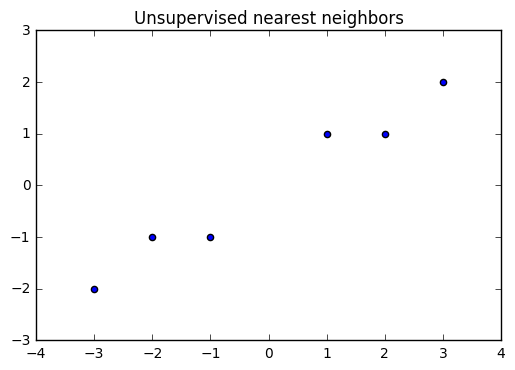

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]], dtype=int64)

In [28]:
# 1.6.1 Unsupervised Nearest Neighbors

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt


# 1.6.1.1 Finding the Nearest Neighbors
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.xlim(X[:,0].min()-1,X[:,0].max()+1)
plt.ylim(X[:,1].min()-1,X[:,1].max()+1)
plt.title("Unsupervised nearest neighbors")
plt.show()

# k个最近的点中包含自己
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)

distances,indices = nbrs.kneighbors(X)

# k个最近点的下标，按升序排列
indices

In [29]:
# k个最近点的最短距离，按升序排列
distances

array([[ 0.        ,  1.        ,  2.23606798],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.41421356,  2.23606798],
       [ 0.        ,  1.        ,  2.23606798],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.41421356,  2.23606798]])

In [30]:
# k个最近点生成的邻接矩阵
nbrs.kneighbors_graph(X).toarray()

array([[ 1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.]])

In [32]:
# 1.6.1.2 KD Tree and Ball Tree Classes
from sklearn.neighbors import KDTree
import numpy as np

# 为了说明KDTree一样可以返回k个最近点的小标？
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X,k = 3,return_distance = False)

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]], dtype=int64)